# **Modelagem Matemática e Computacional - Aula prática 7**
### Nome: Riquelme Freitas Gomes
### Data: 24/09/2023
<br>

# **Objetivo:**
> ### Estudar e pôr em prática a análise de dados utilizando o método de diferenças finitas e sua aplicação na resolução da equação de advecção.

# **Método de Diferenças Finitas**

> #### O método das diferenças finitas é uma técnica numérica amplamente utilizada para resolver equações diferenciais, que são equações matemáticas que envolvem derivadas de funções. Essas equações são comuns em diversas áreas da matemática, física, engenharia e ciências aplicadas, e muitas vezes não têm soluções analíticas conhecidas. Portanto, métodos numéricos como o das diferenças finitas são usados para obter aproximações numéricas das soluções.

<br>

#### A ideia central do método das diferenças finitas é discretizar o domínio da função (ou seja, dividir o domínio contínuo em um conjunto finito de pontos) e, em seguida, aproximar as derivadas da função em cada ponto usando diferenças finitas. Essas diferenças finitas são diferenças entre os valores da função nos pontos discretizados.

<br>

#### Existem várias formas de diferenças finitas, cada uma adequada para diferentes tipos de equações diferenciais. Aqui estão três tipos comuns:
1. #### **Diferenças finitas progressivas:** Nesse método, a derivada da função é aproximada usando a diferença entre o valor da função em um ponto e o valor da função em um ponto adjacente mais à frente no domínio. A fórmula geral é: $$f′(x)≈ \frac{f(x+h) − f(x)} {h},$$ onde $h$ é um pequeno incremento no domínio.
<br>

2. #### **Diferenças finitas regressivas:** Nesse método, a derivada da função é aproximada usando a diferença entre o valor da função em um ponto e o valor da função em um ponto adjacente mais atrás no domínio. A fórmula geral é semelhante à das diferenças finitas progressivas, mas com um sinal negativo: $$f′(x)≈ \frac{f(x) - f(x-h)} {h}$$
<br>

3. #### **Diferenças finitas centrais:** Esse método utiliza uma combinação dos valores da função em pontos adjacentes tanto à esquerda quanto à direita do ponto de interesse para calcular a derivada. A fórmula geral é: $$f′(x)≈ \frac{f(x+h) - f(x-h)} {2h}$$

<br>

#### O método das diferenças finitas pode ser aplicado a equações diferenciais ordinárias (ODEs) e equações diferenciais parciais (PDEs), permitindo a resolução de problemas complexos de maneira aproximada, transformando-os em problemas de álgebra linear ou sistemas de equações que podem ser resolvidos numericamente. A precisão da solução depende do tamanho do passo $h$ escolhido e da ordem da diferença finita utilizada. Quanto menor o valor de $h$, maior a precisão, mas também maior o esforço computacional envolvido. Portanto, a escolha de $h$ é um compromisso entre precisão e eficiência computacional.
<br>

#### **Observações**:
* #### O método de diferenças finitas é uma técnica numérica amplamente utilizada para resolver equações diferenciais parciais.

* #### Ele discretiza o domínio da equação em pontos e substitui as derivadas por diferenças finitas.

* #### Vamos aplicar o método de diferenças finitas para resolver a equação de advecção.

## **Equação de Advecção**


> #### A equação de advecção, também conhecida como equação de transporte, é uma equação diferencial parcial (EDP) que descreve o transporte ou o movimento de uma substância, como um fluido, partículas ou concentrações de uma quantidade física, em um campo de velocidade dado. Essa equação é fundamental em diversas áreas da física e engenharia, especialmente em fluidodinâmica, meteorologia, oceanografia, transporte de poluentes, entre outras.

<br>

#### A equação de advecção é dada por: $$\frac{∂ρ}{∂t} + \frac{∂}{∂x}(ρv) = 0$$
#### onde $ρ$ é a incógnita e $v(ρ)$ é uma relação especificada.

## **Discretização**

- #### Vamos discretizar o domínio da equação em pontos equidistantes ao longo do eixo $x$, com espaçamento $∆x$.

- #### O domínio será dividido em $N$ pontos, onde $N$ é determinado pela extensão do domínio e o espaçamento $∆x$.

- #### As derivadas serão substituídas por diferenças finitas aproximadas.

## **Diferenças Finitas no Espaço**

- #### A derivada espacial $\frac{∂}{∂x}$ será aproximada por uma diferença finita.
- #### Usaremos a diferença finita backward para a derivada espacial: $$\frac{∂}{∂x}(ρv) ≈ \frac{ρ_i v_i − ρ_{i−1}v_{i−1}} {∆x}$$
onde $ρ_i$ e $v_i$ são os valores nos pontos $i$ e $i − 1$.

## **Diferenças Finitas no Tempo**

- #### A derivada temporal $\frac{∂}{∂t}$ será aproximada por uma diferença finita.
- #### Usaremos a diferença finita forward para a derivada temporal: $$\frac{∂p}{∂t} ≈ \frac{ρ_i^{n+1} - ρ_i^{n}} {∆t}$$
onde $ρ_i^{n}$ e $ρ_i^{n+1}$ são os valores de $ρ$ nos tempos $n$ e $n + 1$.

## **Equação Discretizada**

#### Substituindo as diferenças finitas na equação de advecção, obtemos:
$$ \frac{ρ_i^{n+1} - ρ_i^{n}} {∆t} + \frac{ρ_i v_i − ρ_{i−1}v_{i−1}}{∆x}=0 $$

#### Essa é a equação discretizada que será resolvida iterativamente.

## **Passos do método**

1. #### **Inicialização:** Definir as condições iniciais e os parâmetros do problema.
2. #### **Laço Iterativo:** Para cada tempo $n$, calcular os valores de $ρ$ para cada ponto $i$.
3. #### **Condição de Contorno:** Aplicar as condições de contorno em $ρ$ nos pontos $i = 0$ e $i = N − 1$.
4. #### **Atualização:** Avançar para o próximo tempo $n + 1$ e atualizar os valores de $ρ$.
5. #### Repetir os passos $2$ - $4$ até atingir o tempo final desejado.



# **Código Python**
Para rodar os exemplos e realizar experimentos numéricos, utilizei os códigos disponibilizados para essa prática no Google Classroom.

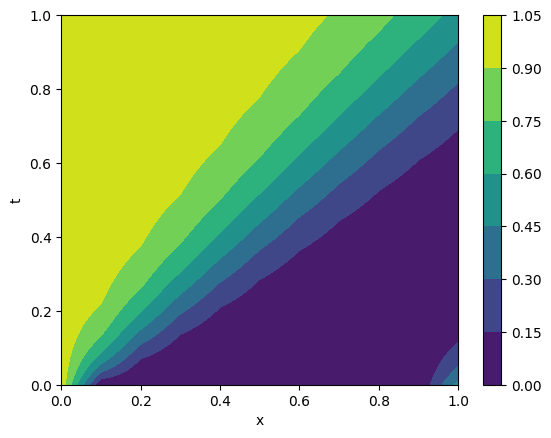

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def solve_advection_equation(L, T, dx, dt, v, rhoo, rhoL):
    # Definir parâmetros do problema
    nx = int(L / dx) + 1
    nt = int(T / dt) + 1
    alpha = dt / dx

    # Inicializar matriz para armazenar a solução
    rho = np.zeros((nt, nx))

    # Condições iniciais
    rho[0, :] = 0.0  # Condição inicial em t = 0

    # Condições de contorno
    rho[:, 0] = rhoo  # Condição em x = 0
    rho[:, -1] = rhoL  # Condição em x = L

    # Loop para avançar no tempo
    for n in range(1, nt):
        # Loop para avançar em x (backward)
        for i in range(1, nx):
            rho[n, i] = rho[n-1, i] - alpha * v(rho[n-1, i]) * (rho[n-1, i] - rho[n-1, i-1])

    return rho

# Função que define a relação v(rho)
def v(rho):
    return 1.0  # Exemplo: velocidade constante

# Parâmetros do problema
L = 1.0  # Comprimento da região
T = 1.0  # Tempo total
dx = 0.1  # Intervalo de espaço
dt = 0.01  # Intervalo de tempo
rhoo = 1.0  # Valor de rho em x = 0
rhoL = 0.5  # Valor de rho em x = L

# Resolver a equação de advecção
rho = solve_advection_equation(L, T, dx, dt, v, rhoo, rhoL)

# Plotar a solução
x = np.linspace(0, L, int(L/dx)+1)
t = np.linspace(0, T, int(T/dt)+1)
X, T = np.meshgrid(x, t)
plt.contourf(X, T, rho)
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()
plt.show()

O código acima resolve a equação de advecção unidimensional e, em seguida, plota a solução em um gráfico. O gráfico é gerado usando a biblioteca Matplotlib e mostra um gráfico de contorno que representa a evolução da densidade (rho) em relação ao espaço (x) e ao tempo (t). Aqui estão os componentes principais do gráfico:


1. Eixo $x$ (horizontal): Este é o eixo que representa o espaço, ou seja, a posição ao longo da região de interesse. O intervalo de espaço é de 0 a $L$, onde L é o comprimento da região especificado nos parâmetros do problema.
2. Eixo $y$ (vertical): Este é o eixo que representa o tempo ($t$), que começa em $t = 0$ e se estende até $T$, onde $T$ é o tempo total especificado nos parâmetros do problema.
3. Cores: As cores no gráfico de contorno representam os valores da densidade (rho) em cada ponto ($x$, $t$). As cores mais escuras indicam densidades menores, enquanto as cores mais claras indicam densidades maiores.

O gráfico permite visualizar como a densidade varia ao longo do tempo e do espaço à medida que a onda de advecção se propaga na região. Isso é útil para entender como a equação de advecção modela o transporte de uma propriedade (nesse caso, a densidade) em uma direção específica com base nas condições iniciais e de contorno.



A interpretação específica do gráfico depende das condições iniciais, das condições de contorno e dos parâmetros do problema (L, T, dx, dt, rhoo, rhoL) que foram definidos no código. Agora, vamos rodá-lo novamente com as mesmas condições e parâmetros, porém agora com uma função diferente que define a relação v(rho).

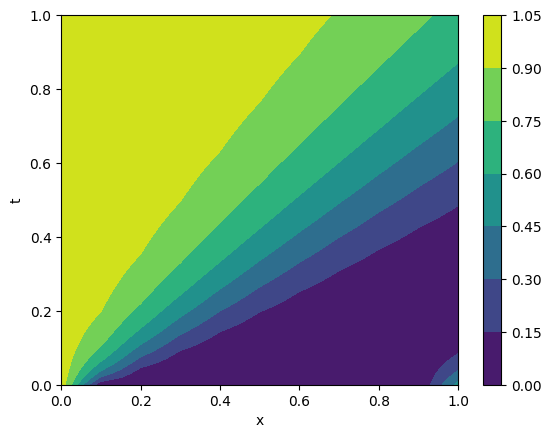

In [ ]:
# Função que define a relação v(rho)
def v(rho):
    A = 1.6
    rhom = 2.0
    return A * (1 - rho / rhom)

# Parâmetros do problema
L = 1.0  # Comprimento da região
T = 1.0  # Tempo total
dx = 0.1  # Intervalo de espaço
dt = 0.01  # Intervalo de tempo
rhoo = 1.0  # Valor de rho em x = 0
rhoL = 0.5  # Valor de rho em x = L

# Resolver a equação de advecção
rho = solve_advection_equation(L, T, dx, dt, v, rhoo, rhoL)

# Plotar a solução
x = np.linspace(0, L, int(L/dx)+1)
t = np.linspace(0, T, int(T/dt)+1)
X, T = np.meshgrid(x, t)
plt.contourf(X, T, rho)
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()
plt.show()

Nessa nova função, a velocidade (v) é inversamente proporcional à densidade (rho). Isso significa que, à medida que a densidade aumenta, a velocidade diminui, e vice-versa. Portanto, quando a densidade é alta (próxima de rhom), a velocidade será baixa, e quando a densidade é baixa (próxima de zero), a velocidade será alta. Dessa forma, o gráfico resultante mostra como a propagação da onda de densidade é afetada por essa relação não linear entre velocidade e densidade. Podemos ver comportamentos diferentes em comparação com uma velocidade constante, já que o algumas faixas de cores se mostraram maiores nesse caso.

Mantendo essa mesma função e parâmetros do problema, no entanto agora trocando as condições iniciais para em $t = 0$ para rhoo, obtemos:

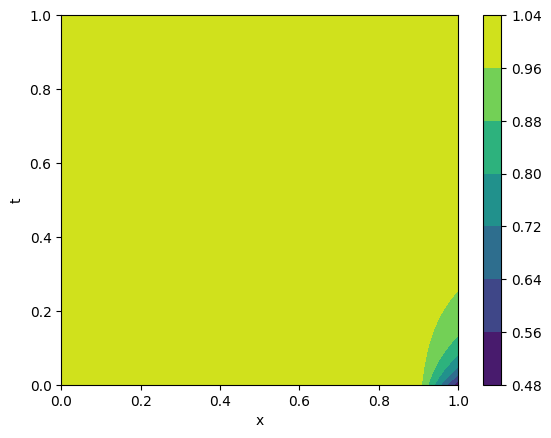

In [23]:
def solve_advection_equation(L, T, dx, dt, v, rhoo, rhoL):
    # Definir parâmetros do problema
    nx = int(L / dx) + 1
    nt = int(T / dt) + 1
    alpha = dt / dx

    # Inicializar matriz para armazenar a solução
    rho = np.zeros((nt, nx))

    # Condições iniciais
    rho[0, :] = rhoo  # Condição inicial em t = 0

    # Condições de contorno
    rho[:, 0] = rhoo  # Condição em x = 0
    rho[:, -1] = rhoL  # Condição em x = L

    # Loop para avançar no tempo
    for n in range(1, nt):
        # Loop para avançar em x (backward)
        for i in range(1, nx):
            rho[n, i] = rho[n-1, i] - alpha * v(rho[n-1, i]) * (rho[n-1, i] - rho[n-1, i-1])

    return rho

# Parâmetros do problema
L = 1.0  # Comprimento da região
T = 1.0  # Tempo total
dx = 0.1  # Intervalo de espaço
dt = 0.01  # Intervalo de tempo
rhoo = 1.0  # Valor de rho em x = 0
rhoL = 0.5  # Valor de rho em x = L

# Resolver a equação de advecção
rho = solve_advection_equation(L, T, dx, dt, v, rhoo, rhoL)

# Plotar a solução
x = np.linspace(0, L, int(L/dx)+1)
t = np.linspace(0, T, int(T/dt)+1)
X, T = np.meshgrid(x, t)
plt.contourf(X, T, rho)
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()
plt.show()

Especificamente, definir todas as densidades no tempo inicial $t = 0$ como rhoo significa que estamos estabelecendo uma densidade constante em toda a região no início da simulação.

Isso implica que, no início, a densidade em toda a região é a mesma e igual a rhoo. Com a função de velocidade v(rho) definida, onde a velocidade diminui à medida que a densidade aumenta, isso levará a uma situação inicial em que a velocidade é relativamente alta (pois a densidade é baixa) em toda a região. À medida que o tempo avança, a onda de densidade se propagará com base na relação entre densidade e velocidade determinada pela função v(rho).

Portanto, a mudança nas condições iniciais para uma densidade constante rhoo resultou em uma propagação da onda de densidade que se comporta de acordo com a relação definida na função v(rho) a partir desse ponto de partida uniforme.

Além disso, vamos plotar o perfil da densidade (rho) em relação ao espaço (x) para diferentes instantes de tempo (t).

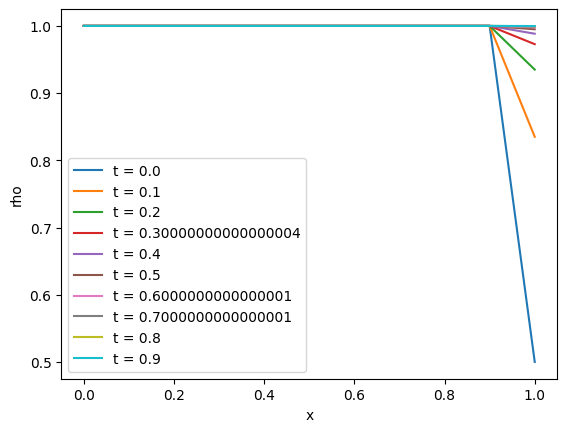

In [24]:
# Plotar perfil de rho para diferentes tempos
intervalo_tempos = 0.1  # Espaçamento entre os tempos plotados
tempos_plotados = np.arange(0, T[-1][0], intervalo_tempos)

fig, ax = plt.subplots()
for tempo in tempos_plotados:
    t_idx = int(tempo / dt)
    ax.plot(x, rho[t_idx, :], label=f't = {tempo}')
ax.set_xlabel('x')
ax.set_ylabel('rho')
ax.legend()
plt.show()

O resultado obtido é um gráfico que mostra como o perfil de densidade (rho) evolui ao longo do espaço (x) para os tempos especificados em tempos_plotados. Isso permite observar como a onda de densidade se propaga e muda à medida que o tempo avança, oferecendo uma representação visual mais detalhada do comportamento da equação de advecção em diferentes momentos da simulação.

# **Conclusão**

#### O método de diferenças finitas é uma técnica numérica amplamente utilizada na resolução de equações diferenciais parciais, incluindo a equação de advecção. Ele desempenha um papel crucial na modelagem e na simulação de fenômenos que envolvem transporte, propagação, difusão e convecção, como o movimento de fluidos, dispersão de poluentes, transferência de calor e muito mais.

#### A aplicação do método de diferenças finitas na resolução da equação de advecção envolve discretizar o espaço e o tempo em uma grade (ou malha) e aproximando as derivadas espaciais e temporais por diferenças finitas. Esse método é eficaz para lidar com problemas de advecção, onde uma propriedade (como a densidade) é transportada por uma velocidade específica. Ele permite simular como essa propriedade se move e se propaga ao longo do espaço e do tempo.

#### Portanto, nesse prática compreendemos os passos envolvidos no método e implementamos o código em Python para resolver o problema. Os resultados obtidos nos permitem analisar o comportamento da variável $ρ$ ao longo do tempo e do domínio.

# **Fontes e referências**

1. Método das diferenças finitas. https://pt.wikipedia.org/wiki/Método_das_diferenças_finitas
2. O Método das Diferenças Finitas. http://lacoi.ufba.br/imagens_Lacoi/docs_pdf/7diferenciacaonumerica.pdf
3. Métodos numéricos para solução da equação de transporte
de massa. https://semengo.furg.br/images/2006/31.pdf
4. CONCEITUAÇÃO E PROCESSOS
DE MEDIDA DAS VARIÁVEIS
FUNDAMENTAIS DO TRÁFEGO. https://pessoas.feb.unesp.br/barbara/files/2011/02/aula-10.pdf